In [138]:
import matplotlib.pyplot as plt #определим размеры для графиков

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Линейная регрессия и градиентный спуск

In [49]:
from sklearn.preprocessing import add_dummy_feature

In [50]:
import numpy as np 
 
np.random.seed(42)  # чтобы сделать этот код воспроизводимым 
m = 100  # кол-во экземпляров 
X = 2 * np.random.rand(m, 1)  # column vector 
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector 

In [51]:
X_b = add_dummy_feature(X) # добавить x0 = 1 к каждому экземпляру

In [52]:
#X

In [53]:
#X_b 

Формула нормального уравнения ($w=(X^TX)^{-1}X^Ty$), позволяющего найти значение весов-коэффициентов модели, которое минимизирует MSE:

In [54]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y #np.linalg для вычисления обратной матрицы

In [55]:
theta_best #должны были получить 4 и 3, как в уровнении

array([[4.21509616],
       [2.77011339]])

Сделаем предсказания:

In [56]:
X_new = np.array([[0], [2]]) 
X_new_b = add_dummy_feature(X_new)  # добавить x0 = 1 к каждому экземпляру, х0 всегда должен быть равен 1, так как w0 - это член смещения, а не коэффициент
y_predict = X_new_b @ theta_best 
y_predict 
 

array([[4.21509616],
       [9.75532293]])

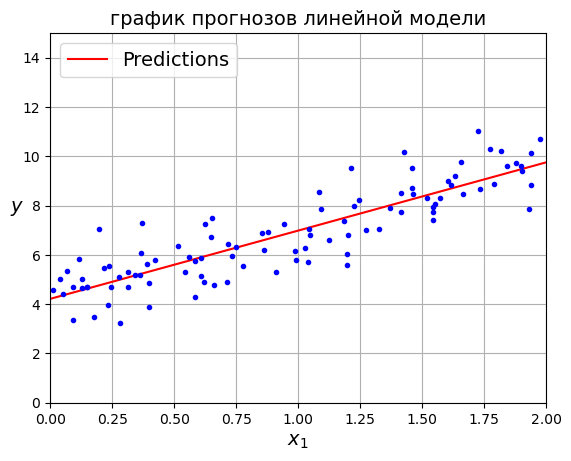

In [57]:
import matplotlib.pyplot as plt 
 
plt.plot(X_new, y_predict, "r-", label="Predictions") 
plt.plot(X, y, "b.") 
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.title("график прогнозов линейной модели")
plt.show() 

Выполнение линейной регрессии с использованием Scikit-Learn относительно просто: 

In [58]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression() 
lin_reg.fit(X, y) 
lin_reg.intercept_, lin_reg.coef_ 

(array([4.21509616]), array([[2.77011339]]))

In [59]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Класс LinearRegression основан на scipy.linalg.lstsq()функции (название расшифровывается как «наименьшие квадраты»), которую вы можете вызвать напрямую: 

In [60]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6) 
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [61]:
#np.linalg.pinv()для прямого вычисления псевдоинверсии: 

np.linalg.pinv(X_b) @ y 
 

array([[4.21509616],
       [2.77011339]])

 Шаг градиентного спуска:  𝛉(next step)= 𝛉 - η ∇ θ MSE( θ ) 

In [62]:
eta = 0.1  #скорость обучения
n_epochs = 1000 #каждая итерация обучающего набора называется эпохой
m = len(X_b)  # кол-во экземпляров
 
np.random.seed(42) 
theta = np.random.randn(2, 1)  # случайно инициализированные параметры модели
 
for epoch in range(n_epochs): 
    gradients = 2 / m * X_b.T @ (X_b @ theta - y) 
    theta = theta - eta * gradients 

In [63]:
theta

array([[4.21509616],
       [2.77011339]])

Этот код реализует стохастический градиентный спуск, используя простой график обучения: 

In [64]:
n_epochs = 50 
t0, t1 = 5, 50  # гиперпараметры для обучения
 
def learning_schedule(t): 
    return t0 / (t + t1) 
 
np.random.seed(42) 
theta = np.random.randn(2, 1)  # случайная инициализация
 
for epoch in range(n_epochs): 
    for iteration in range(m): 
        random_index = np.random.randint(m) 
        xi = X_b[random_index : random_index + 1] 
        yi = y[random_index : random_index + 1] 
        gradients = 2 * xi.T @ (xi @ theta - yi)  # для SGD не делить на m
        eta = learning_schedule(epoch * m + iteration) 
        theta = theta - eta * gradients 

В то время как код пакетного градиентного спуска повторяется 1000 раз через весь тренировочный набор, этот код проходит через тренировочный набор только 50 раз и достигает довольно хорошего решения: 

In [65]:
theta

array([[4.21076011],
       [2.74856079]])

Чтобы выполнить линейную регрессию с использованием стохастического градиентного спуска с помощью Scikit-Learn, можно использовать класс SGDRegressor, который по умолчанию оптимизирует функцию стоимости MSE.

In [66]:
from sklearn.linear_model import SGDRegressor 
 
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, 
                       n_iter_no_change=100, random_state=42) 
sgd_reg.fit(X, y.ravel())  # y.ravel(), потому что fit() ожидает одномерные цели
sgd_reg.intercept_, sgd_reg.coef_ 


(array([4.21278812]), array([2.77270267]))

Код, рассмотренный выше, выполняет не более 1000 эпох (max_iter) или до тех пор, пока потери не упадут менее чем на 1е–5  tol за 100 эпох ( n_iter_no_change). Он начинается со скорости обучения 0,01 ( eta0), используя график обучения по умолчанию (отличный от того, который мы использовали). Наконец, он не использует никакой регуляризации ( penalty=None).

**Мини-пакетный градиентный спуск.** 

Это просто, если вы знаете пакетный и стохастический градиентный спуск: на каждом этапе вместо вычисления градиентов на основе полного обучающего набора (как в пакетном GD) или на основе только одного экземпляра (как в стохастическом GD) мини-пакетный GD вычисляет градиенты на небольших случайных наборах экземпляров, называемых мини-пакетами .Основное преимущество мини-пакетного GD перед стохастическим GD заключается в том, что вы можете получить прирост производительности за счет аппаратной оптимизации матричных операций, особенно при использовании графических процессоров. 

# Полиноминальная регрессия

Cоздадим некоторые  неленейные данные:

In [67]:
np.random.seed(42) 
m = 100 #кол-во обучаемых экземпляров
X = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) #неленейные данные, основанные на квадратном уравнении плюс некоторы шум

In [68]:
from sklearn.preprocessing import PolynomialFeatures #генирирует полиномиальные и интерактивные функции.
poly_features = PolynomialFeatures(degree=2, include_bias=False) #degree - степень, если задано одно целое число, оно указывает максимальную степень полиномиальных признаков.
X_poly = poly_features.fit_transform(X) 
X[0] 


array([-0.75275929])

In [69]:
X_poly[0] #X_poly теперь содержит исходную функцию X плюс квадрат этой функции.

array([-0.75275929,  0.56664654])

Теперь мы можем подогнать LinearRegression модель к этим расширенным обучающим данным:

In [70]:
lin_reg = LinearRegression() 
lin_reg.fit(X_poly, y) 
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

В Scikit-Learn есть полезная **learning_curve()** функция - она обучает и оценивает модель с помощью перекрестной проверки. Функция возвращает размеры обучающего набора, при которых она оценивала модель, а также оценки обучения и проверки, измеренные для каждого размера и для каждой складки перекрестной проверки. 

In [71]:
from sklearn.model_selection import learning_curve 

-1.6511534807557486
-1.8398390261760305


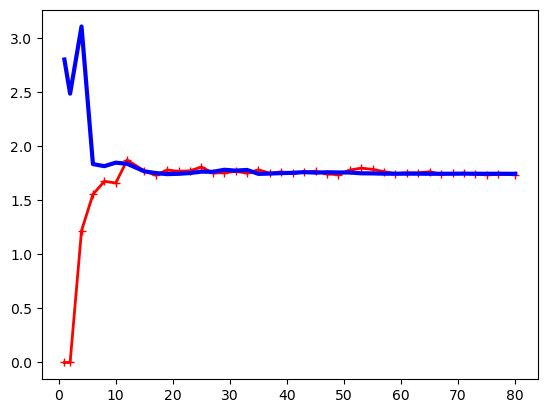

In [72]:
train_sizes, train_scores, valid_scores = learning_curve( 
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, 
    scoring="neg_root_mean_squared_error") 
print(train_scores.mean())
print(valid_scores.mean())
train_errors = -train_scores.mean(axis=1) 
valid_errors = -valid_scores.mean(axis=1) 
 
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train") 
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid") 
[...]  # beautify the figure: add labels, axis, grid, and legend 
plt.show() 

 Эта модель недоработана. Эти кривые обучения типичны для неподходящей модели. Обе кривые достигли плато; они близки и достаточно высоки. Теперь давайте посмотрим на кривые обучения полиномиальной модели 10-й степени на тех же данных:

In [73]:
from sklearn.pipeline import make_pipeline 
 
polynomial_regression = make_pipeline( 
    PolynomialFeatures(degree=10, include_bias=False), 
    LinearRegression()) 
 
train_sizes, train_scores, valid_scores = learning_curve( 
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, 
    scoring="neg_root_mean_squared_error") 
[...]  # same as earlier 

[Ellipsis]

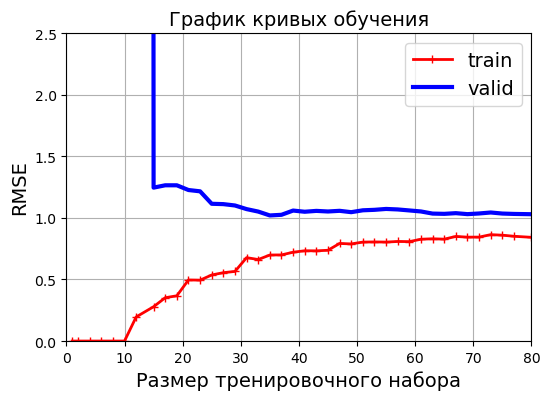

In [74]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Размер тренировочного набора")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.title("График кривых обучения")
plt.show()

In [75]:
train_scores.mean()

-0.5884384803425167

In [76]:
valid_scores.mean()

-322.06623752186033

# Регуляризированные линейные модели

## Ridge Регрессия

ПРЕДУПРЕЖДЕНИЕ 

Важно масштабировать данные (например, с помощью StandardScaler) перед выполнением гребневой регрессии, поскольку она чувствительна к масштабу входных объектов. Это верно для большинства регуляризованных моделей. 

Решение гребневой регрессии в закрытой форме 

$w = (X^TX + aA)^{-1} X^Ty$

A — единичная матрица размера ( n + 1) × ( n + 1) 

In [77]:
# дополнительный код — мы делали этот тип генерации несколько раз раньше
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [78]:
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=0.1, solver="cholesky") #вариант, в котором используется метод матричной факторизации Андре-Луи Холески
ridge_reg.fit(X, y) 
ridge_reg.predict([[1.5]]) 


array([[1.55325833]])

In [79]:
# используя стохастический градиентный спуск:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, 
                       max_iter=1000, eta0=0.01, random_state=42) 

sgd_reg.fit(X, y.ravel())  # y.ravel(), потому что fit() ожидает одномерные цели
sgd_reg.predict([[1.5]])

array([1.55302613])

 penalty задает тип используемого термина регуляризации. Указание "l2" означает, что стахастический градиентный спуск добавил член регуляризации к функции стоимости MSE, равный alpha умножению на квадрат ℓ 2 нормы вектора весов. Это похоже на гребневую регрессию, за исключением того, что в этом случае нет деления на m ; вот почему мы прошли alpha=0.1 / m, чтобы получить тот же результат, что и Ridge(alpha=0.1)

- Класс RidgeCV также выполняет гребневую регрессию, но автоматически настраивает гиперпараметры с помощью перекрестной проверки. Это примерно эквивалентно использованию GridSearchCV, но оптимизировано для гребневой регрессии и работает намного быстрее. Некоторые другие оценщики (в основном линейные) также имеют эффективные варианты CV, такие как LassoCV и ElasticNetCV. 

## Lasso Регрессия

Важной характеристикой лассо-регрессии является то, что она имеет тенденцию устранять веса наименее важных признаков (т. е. устанавливать их равными нулю). Другими словами, регрессия лассо автоматически выполняет выбор признаков и выводит разреженную модель с несколькими ненулевыми весами признаков. 

In [80]:
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha=0.1) 
lasso_reg.fit(X, y) 
lasso_reg.predict([[1.5]]) 


array([1.53788174])

In [81]:
# используя стохастический градиентный спуск:
sgd_reg = SGDRegressor(penalty="l1", alpha=0.1, random_state=42) 
sgd_reg.fit(X, y.ravel())  # y.ravel(), потому что fit() ожидает одномерные цели
sgd_reg.predict([[1.5]])

array([1.45526648])

## ElasticNet Регрессия

Эластичная сетевая регрессия представляет собой нечто среднее между гребневой регрессией и лассо-регрессией. Термин регуляризации представляет собой взвешенную сумму условий регуляризации гребня и лассо, и вы можете управлять коэффициентом смешивания r . Когда r = 0, эластичная сетка эквивалентна регрессии гребня, а когда r = 1, она эквивалентна регрессии лассо 

In [82]:
from sklearn.linear_model import ElasticNet 
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) 
elastic_net.fit(X, y) 
elastic_net.predict([[1.5]]) 

array([1.54333232])

## Краткий вывод

**Итак, когда вам следует использовать эластичную сетевую регрессию, гребень, лассо или простую линейную регрессию (т. е. без какой-либо регуляризации)?**
- Почти всегда предпочтительнее иметь хотя бы небольшую регуляризацию, поэтому обычно вам следует избегать простой линейной регрессии. 

- Ridge — хороший выбор по умолчанию, но если вы подозреваете, что полезны только некоторые функции, вам следует предпочесть **lasso** или **эластичную сеть**, потому что они, как правило, уменьшают вес бесполезных функций до нуля, как обсуждалось ранее. В общем, эластичная сеть предпочтительнее лассо, потому что лассо может вести себя хаотично, когда количество признаков превышает количество обучающих экземпляров или когда несколько признаков сильно коррелируют. 

# Ранняя остановка

Совершенно другой способ упорядочить алгоритмы итеративного обучения, такие как градиентный спуск, состоит в том, чтобы прекратить обучение, как только ошибка проверки достигнет минимума. Вот базовая реализация ранней остановки: 

In [83]:
from copy import deepcopy 
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler 

np.random.seed(42) # создает тот же квадратичный набор данных, что и ранее, и разбивает его
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

# Этот код сначала добавляет полиномиальные функции и масштабирует все входные функции как для обучающего набора, так и для проверочного набора 
# (код предполагает, что вы разделили исходный обучающий набор на меньший обучающий набор и проверочный набор)
 
preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), 
                              StandardScaler()) 
X_train_prep = preprocessing.fit_transform(X_train) 
X_valid_prep = preprocessing.transform(X_valid) 

# Затем он создает SGDRegressor модель без регуляризации и с небольшой скоростью обучения. 
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42) 
n_epochs = 500 
best_valid_rmse = float('inf') 
 
for epoch in range(n_epochs): 
    sgd_reg.partial_fit(X_train_prep, y_train) # В цикле обучения он вызывает partial_fit()вместо fit(), для выполнения добавочного обучения.
    y_valid_predict = sgd_reg.predict(X_valid_prep) 
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False) 
    if val_error < best_valid_rmse: 
        best_valid_rmse = val_error 
        best_model = deepcopy(sgd_reg) 

# В каждую эпоху он измеряет RMSE на проверочном наборе. 
# Если он ниже наименьшего RMSE, наблюдаемого до сих пор, копия модели сохраняется в переменной best_model.

Обратите внимание, что модель копируется с помощью copy.deepcopy(), потому что она копирует как гиперпараметры модели , так и изученные параметры. Напротив, sklearn.base.clone()копирует только гиперпараметры модели. 

# Логическая регрессия

Попробуем построить классификатор для определения типа Iris virginica , основываясь только на признаке ширины лепестка. Первый шаг — загрузить данные и быстро просмотреть: 

In [84]:
from sklearn.datasets import load_iris # загрузка датасета ирисов
iris = load_iris(as_frame=True) 
list(iris) 
['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 
 'filename', 'data_module'] 
iris.data.head(3) 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [85]:
iris.target.head(3) 

0    0
1    0
2    0
Name: target, dtype: int32

In [86]:
iris.target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Далее мы разделим данные и обучим модель логистической регрессии на обучающем наборе: 

In [87]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
 
X = iris.data[["petal width (cm)"]].values # ширина лепестков
y = iris.target_names[iris.target] == 'virginica' # искомый вид ириса
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
log_reg = LogisticRegression(random_state=42) 
log_reg.fit(X_train, y_train) # обучили модель

LogisticRegression(random_state=42)

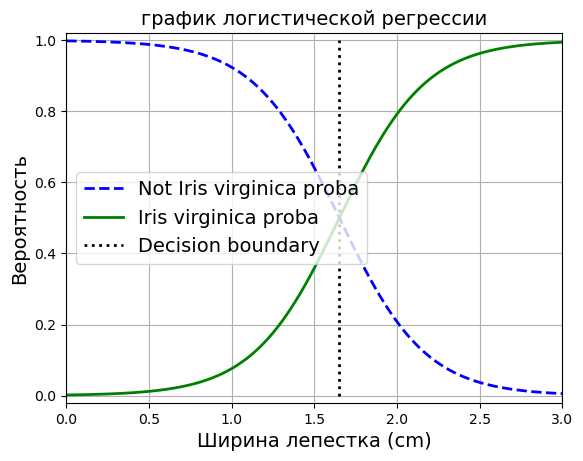

In [92]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # изменить форму, чтобы получить вектор-столбец 
y_proba = log_reg.predict_proba(X_new) #сделать предсказание
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0] #определить порог
 
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, 
         label="Not Iris virginica proba") 
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba") 
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, 
         label="Decision boundary") 
plt.xlabel("Ширина лепестка (cm)")
plt.ylabel("Вероятность")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.title('график логистической регрессии')
plt.show() 

Гиперпараметр, контролирующий силу регуляризации модели Scikit-Learn, LogisticRegression не является alpha (как в других линейных моделях), а обратным: C. Чем выше значение C, тем меньше модель регуляризована. 

# Регрессия Softmax 

Классификатор регрессии softmax предсказывает только один класс за раз (т. е. он мультиклассовый, а не мультивыходной), поэтому его следует использовать только с взаимоисключающими классами, такими как разные виды растений. Вы не можете использовать его для распознавания нескольких людей на одном изображении. 

**Классификатор Scikit-Learn LogisticRegression автоматически использует регрессию softmax, когда вы обучаете его на более чем двух классах (при условии, что вы используете solver="lbfgs", что является значением по умолчанию).**

In [89]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values #преобразовали датасет в вектор
y = iris["target"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
softmax_reg = LogisticRegression(C=30, random_state=42) 
softmax_reg.fit(X_train, y_train) 

LogisticRegression(C=30, random_state=42)

In [90]:
softmax_reg.predict([[5, 2]]) # передали длинну и ширину лепестка, получили ирис №2

array([2])

In [91]:
softmax_reg.predict_proba([[5, 2]]).round(2) # вероятность, что это ирис №0 - равна нулю, что это ирис №1 - 4%, что это ирис №2 - 96%

array([[0.  , 0.04, 0.96]])

# Самостоятельное упражнение

Реализуйте пакетный градиентный спуск с ранней остановкой для регрессии softmax без использования Scikit-Learn, только NumPy. Используйте его в задаче классификации, такой как набор данных радужной оболочки. 

In [93]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values # загрузка данных из набора ирис
y = iris["target"].values

Реализуем add_dummy_feature с помощью библиотеки NumPy:

In [95]:
X_with_bias = np.c_[np.ones(len(X)), X] #добавили единицу к каждому вектору

- Пример np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])
       
np.c_ преобразует объекты среза в конкатенацию вдоль второй оси.

- Пример np.ones((5,), dtype=int)

array([1, 1, 1, 1, 1])

np.ones возвращает новый массив заданной формы и типа, заполненный единицами.

In [101]:
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [99]:
X_with_bias[:5]

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2]])

Реализуем train_test_split вручную с помощью NumPy:

In [105]:
# переменные для определения размера обучающих и проверяющих датасетов
test_ratio = 0.2 # соотношение тестовых данных 
validation_ratio = 0.2 # соотношение валидационных данных
total_size = len(X_with_bias) # общий размер равен длинне массива X_with_bias - 150

test_size = int(total_size * test_ratio) # int задает целое число
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42) #задает порядок генерации случайных последовательностей, в результате чего сгенирированные случайные числа не меняют свой порядок
rnd_indices = np.random.permutation(total_size) # np.random.permutation перемешивает данные 

#разделяем массивы с данными:
X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

В настоящее время целями являются индексы классов - (0, 1 или 2) для каждого цветка

но нам нужны вероятности целевых классов для обучения регрессионной модели Softmax. 

Каждый экземпляр будет иметь вероятности целевого класса, равные 0,0 для всех классов, за исключением целевого класса, который будет иметь вероятность 1,0 (другими словами, вектор вероятностей класса для любого данного экземпляра является однократным вектором). 

Напишем небольшую функцию для преобразования вектора индексов класса в матрицу, содержащую однократный вектор для каждого экземпляра. 

- np.diag(np.ones(n)) создает матрицу n × n, полную нулей, за исключением единиц на главной диагонали. Более того, если a является массивом NumPy, то a[[1, 3, 2]] возвращает массив с 3 строками, равными a[1], a[3] и a[2] (это расширенная индексация NumPy).

In [106]:
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y]

In [109]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [111]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [112]:
#теперь легко определить к какому виду относится цветок с определенными параметрами
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Масштабируем признаки:

In [120]:
mean = X_train[:, 1:].mean(axis=0) #среднее значение признаков в обучающем наборе (среднее значение во втором столбце и среднее в третьем, первый не берем, так как он состоит из единиц
std = X_train[:, 1:].std(axis=0) #стандартное отклонение для обучающей выборки 
# формула для центрации и масштабирования:
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

In [121]:
#(X_train[:, 1:]-X_train[:, 1:].mean(axis=0))/X_train[:, 1:].std(axis=0)

Реализуем модель softmax через функцию, которая определяется уравнением $σ(s(x))_k=exp(s_k(x))/∑_{j=1}^Kexp(s_j(x))$

In [122]:
def softmax(logits):
    exps = np.exp(logits) # np.exp - вычислить экспоненту всех элементов входного массива
    exp_sums = exps.sum(axis=1, keepdims=True) # keepdims=True вернет массив, а не скаляр
    return exps / exp_sums

Определим количество выходов(фичей) и входов(целевых переменных):

In [123]:
n_inputs = X_train.shape[1]  #== 3 (2 признака плюс смещение)
n_outputs = len(np.unique(y_train))  # == 3 (есть три класса ирисов)

Обучение:

In [132]:
eta = 0.5 #порог
n_epochs = 5001 # кол-во итераций
m = len(X_train) #кол-во элементов в выборке
epsilon = 1e-5 #добавим крошечное число, на случай если предсказание для валидации равно 0

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs) #зафиксированная случайная матрица 3 на 3

for epoch in range(n_epochs): #для каждой итерации 
    logits = X_train @ Theta #умножаем матрицу с признаками на случайную квадратную матрицу
    Y_proba = softmax(logits) # передаем полученную матрицу в модель
    if epoch % 1000 == 0: # где % - остаток от деления, то есть по сути для каждой тысячной итерации вычисляется следующее:
        Y_proba_valid = softmax(X_valid @ Theta) #модель вычисляет предсказание для валидационной выборки
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon)) # Формула определения функции стоимости
        print(epoch, xentropy_losses.sum(axis=1).mean()) 
    error = Y_proba - Y_train_one_hot #ошибка модели 
    gradients = 1 / m * X_train.T @ error # уравнение градиента
    Theta = Theta - eta * gradients 

0 3.7085808486476917
1000 0.14519367480830644
2000 0.13013095755040874
3000 0.12009639326384534
4000 0.11372961364786885
5000 0.11002459532472428


Уравнение для функции стоимости модели softmax: $J(\mathbf{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

Уравнение для градиентов модели softmax: - $\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Посмотрим на полученные параметры модели softmax:

In [133]:
Theta 

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])


Давайте сделаем прогнозы для проверочного набора и проверим оценку точности:

In [134]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1) # возвращает номер столбца с самым высоким предсказанием

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

Точность 93,3%.

Теперь применим модель ко всем наборам с данными:

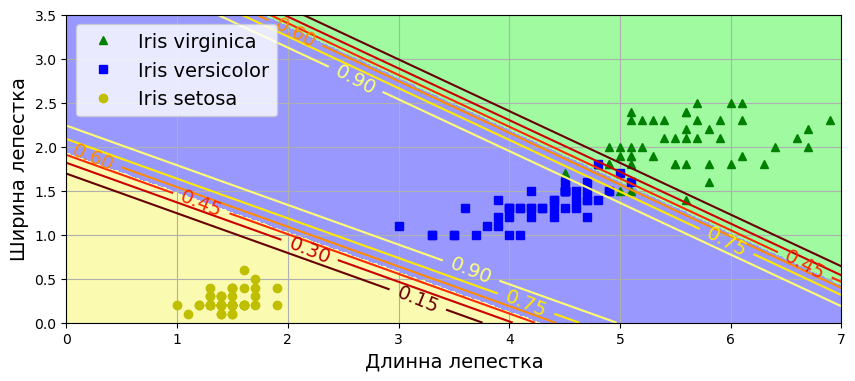

In [140]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0']) #Объект цветовой карты, сгенерированный из списка цветов.

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1)) #cетка координат, а linspace возвращает равномерно распределенные числа, например от 0 до 8, число шагов = 500
#reshape придает новую форму массиву без изменения его данных (a , newshape)
X_new = np.c_[x0.ravel(), x1.ravel()] # ravel возвращает одномерный массив
X_new = (X_new - mean) / std #масштабирование признаков
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new] #новый массив, заполненный единицами сконкатинированн с массивом X_new

logits = X_new_with_bias @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Длинна лепестка")
plt.ylabel("Ширина лепестка")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()

Измерим точность конечной модели на тестовом наборе:

In [141]:
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9666666666666667

Вопросы и ответы по теме Линейная регрессия:

- Какой алгоритм обучения линейной регрессии вы можете использовать, если у вас есть обучающий набор с миллионами признаков? 

(ответ: стахостический градиентный спуск или мини-пакетный градиентный спуск, а также пакетный градиентный спуск, если тренировочный набор помещается в памяти, простая линейная регрессия не подойдет, так как сложность вычесления растет с кол-вом функций) 

- Предположим, что функции в вашем обучающем наборе имеют очень разные масштабы. Какие алгоритмы могут от этого пострадать и как? Что вы можете с этим поделать?

(ответ: градиентный спуск нуждается в масштабировании, это увеличит скорость обучения, простая линейная регрессия может обходится без масштабирования признаков, а вот регулярезованные модели также нуждаются в масштабировании, иначе решение может быть неоптимальным). 

- Может ли градиентный спуск застрять в локальном минимуме при обучении модели логистической регрессии? 

(ответ: не может, так как функция стоимости выпуклая). 

- Все ли алгоритмы градиентного спуска приводят к одной и той же модели, если вы позволяете им работать достаточно долго? 

(ответ: стахостический градиентный спуск и мини-пакетный градиентный спуск никогда не сойдутся и будут давать немного разный результат). 

- Предположим, вы используете пакетный градиентный спуск и рисуете ошибку проверки в каждую эпоху. Если вы заметили, что ошибка проверки постоянно увеличивается, что, вероятно, происходит? Как это исправить? 

(ответ: скорей всего скорость обучения модели слишком высокая и ее следует понизить, однако стоит помнить, что если ошибка не увеличивается, значит модель переобучилась и стоит прекратить обучение). 

- Стоит ли сразу же останавливать мини-пакетный градиентный спуск, когда ошибка валидации возрастает? 

(ответ: не стоит, так как эти модели имеют случайный характер и не гарантируют прогресс на каждой итерации, если остановится слишком рано можно не достигнуть оптима, лучше сохранять модель через равные промежутки времени, и если модель не улучшается в течение длительного времени вернуться к лучшей сохраненной модели). 

- Какой алгоритм градиентного спуска (из тех, что мы обсуждали) быстрее всего достигнет окрестности оптимального решения? Что на самом деле сойдется? Как сделать так, чтобы остальные тоже сходились? 

(ответ: стахостический градиентный спуск или мини-пакетный с очень маленьким размером мини-пакета, а сойдется с оптимальным решением только пакетный градиентный спуск при достаточном времени на обучение. Чтоб остальные модели тоже сходились, необходимо уменьшить скорость обучения).  

- Предположим, вы используете полиномиальную регрессию. Вы строите кривые обучения и замечаете, что существует большой разрыв между ошибкой обучения и ошибкой проверки. Что происходит? Каковы три способа решить эту проблему? 

(ответ: если ошибка проверки больше, чем ошибка на тренировочной выборке, значит модель переобучилась, первый способ решить проблему - уменьшить кол-во степеней свободы, второй - увеличить тренировочный набор, третий - то упорядочить модель, например, добавив штраф ℓ₂ (Ридж) или штраф ℓ₁ (Лассо) к функции стоимости). 

- Предположим, вы используете гребенчатую регрессию и заметили, что ошибка обучения и ошибка проверки почти равны и довольно высоки. Можно ли сказать, что модель страдает от высокого смещения или высокой дисперсии? Должны ли вы увеличить гиперпараметр регуляризации α или уменьшить его? 

(ответ: да, можно. Стоит уменьшить параметр регуляризации альфа).  

- Почему вы хотите использовать: 
а) Гребневая регрессия вместо простой линейной регрессии (т. е. без какой-либо регуляризации)? 
б) Лассо вместо гребневой регрессии? 
в) Эластичная сеть вместо регрессии лассо? 

(ответ: а) модель с регурялизацией работает лучше, чем простая линейная регрессия.; б) если известно, что много незначительных признаков, лучше выбирать лассо, потому что она снижает значения признаков до нуля кроме самых важных; в) лассо ведет себя хаотично, если есть признаки, которые сильно коррелируют между собой или признаков больше, чем обучающих экземпляров, в этом случае лучше использовать эластичную регрессию). 

- Предположим, вы хотите классифицировать изображения как наружные/внутренние и дневные/ночные. Должны ли вы реализовать два классификатора логистической регрессии или один классификатор регрессии softmax? 

(ответ: два классификатора логической регрессии, так как возможны все четыре комбинации и это не исключительные классы). 